### Subsets
Given a set of distinct integers, nums, return all possible subsets (the power set).

Note: The solution set must not contain duplicate subsets.

In [4]:
def subsets(nums):
    subsets = []
    subsets.append([])
    for num in nums:
        size = len(subsets)
        for i in range(size):
            set = subsets[i][:]
            set.append(num)
            subsets.append(set)
    return subsets

nums = [1,2,3]
subsets(nums)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

### Subsets with Duplicates

In [7]:
def subsetsWithDup(nums):
    subsets = [[]]; nums.sort()
    for i in range(len(nums)):
        startIndex = 0
        if i>0 and nums[i] == nums[i-1]:
            startIndex = size
        size = len(subsets)
        for j in range(startIndex, size):
            set = subsets[j][:]
            set.append(nums[i])
            subsets.append(set)
    return subsetsWithDup

nums = [3,3,1]
subsetsWithDup(nums)

[[], [1], [3], [1, 3], [3, 3], [1, 3, 3]]

### Permutation without duplicate


In [9]:
def permute(nums):
    ans = []
    permutations = [[]]
    for num in nums:
        size = len(permutations)
        for i in range(size):
            old_perm = permutations.pop(0)
            for j in range(len(old_perm)+1):
                new_perm = old_perm[:]
                new_perm.insert(j, num)
                if len(new_perm) == len(nums):
                    ans.append(new_perm[:])
                else:
                    permutations.append(new_perm[:])
    return ans

nums = [1,2,3]
permute(nums)

[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]

### Letter Case Permutation
Given a string S, we can transform every letter individually to be lowercase or uppercase to create another string.  Return a list of all possible strings we could create.

Examples:
* Input: S = "a1b2"
* Output: ["a1b2", "a1B2", "A1b2", "A1B2"]

In [10]:
def letterCasePermutation(S):
    result = [S]
    for i in range(len(S)):
        if S[i].isdigit(): continue
        size = len(result)
        for j in range(size):
            array = list(result[j])
            array[i] = array[i].swapcase()
            result.append(''.join(array))
    return result

S = 'a1b2'
letterCasePermutation(S)

['a1b2', 'A1b2', 'a1B2', 'A1B2']

### Generate Parenthesis


In [3]:
class Parentheses:
    def __init__(self, string, open, close):
        self.string = string
        self.open = open
        self.close = close
        
def generateParenthesis(n):
    ps = Parentheses('', 0, 0); queue = [ps]; ans = []
    while queue:
        size = len(queue)
        for i in range(size):
            ps = queue.pop(0)
            if ps.open == n and ps.close == n:
                ans.append(ps.string)
            else:
                if ps.open<n:
                    new_ps = Parentheses(ps.string + '(', ps.open+1, ps.close)
                    queue.append(new_ps)
                if ps.open>ps.close:
                    new_ps = Parentheses(ps.string + ')', ps.open, ps.close+1)
                    queue.append(new_ps)
    return ans

generateParenthesis(3)

['((()))', '(()())', '(())()', '()(())', '()()()']

### Generalized Abbreviation
Write a function to generate the generalized abbreviations of a word. 

Note: The order of the output does not matter.

Example:

Input: "word"
Output:
["word", "1ord", "w1rd", "wo1d", "wor1", "2rd", "w2d", "wo2", "1o1d", "1or1", "w1r1", "1o2", "2r1", "3d", "w3", "4"]

In [2]:
class Solution:
    def generateAbbreviations(self, word: str):
        queue = [Abbreviation('', 0, 0)]; result = []
        while queue:
            size = len(queue)
            for _ in range(size):
                abb = queue.pop(0)
                if abb.start == len(word):
                    if abb.count != 0:
                        abb.string += str(abb.count)
                    result.append(abb.string)
                
                else:
                    queue.append(Abbreviation(abb.string, abb.count+1, abb.start+1))
                    if abb.count != 0:
                        abb.string += str(abb.count)
                    abb.string += word[abb.start]
                    abb.count = 0; abb.start += 1
                    queue.append(abb)
        return result
                
        

class Abbreviation:
    def __init__(self, string, count, start):
        self.string = string
        self.count = count
        self.start = start
        

obj = Solution()
obj.generateAbbreviations('word')

['4',
 '3d',
 '2r1',
 '2rd',
 '1o2',
 '1o1d',
 '1or1',
 '1ord',
 'w3',
 'w2d',
 'w1r1',
 'w1rd',
 'wo2',
 'wo1d',
 'wor1',
 'word']

### Different Ways to Add Parentheses
Given a string of numbers and operators, return all possible results from computing all the different possible ways to group numbers and operators. The valid operators are +, - and *.

* Input: "2\*3-4\*5"
* Output: [-34, -14, -10, -10, 10]

Explanation: 
            * (2*(3-(4*5))) = -34 
            * ((2*3)-(4*5)) = -14 
            * ((2*(3-4))*5) = -10 
            * (2*((3-4)*5)) = -10 
            * (((2*3)-4)*5) = 10

In [2]:
class Solution:
    def diffWaysToCompute(self, input: str):
        self.operator = {'+':lambda x,y:x+y, '-':lambda x,y: x-y, '*':lambda x,y: x*y}
        self.cache = {}
        return self.helper(input)
    
    def helper(self, input):
        if input in self.cache: return self.cache[input]
        if input.isdigit(): return [int(input)]
        result = []
        for i, char in enumerate(input):
            if char in self.operator:
                left_part = self.helper(input[:i])
                right_part = self.helper(input[i+1:])
                for num1 in left_part:
                    for num2 in right_part:
                        result.append(self.operator[char](num1, num2))
                        
        self.cache[input] = result
        return result

obj = Solution()
input = "2*3-4*5"
obj.diffWaysToCompute(input)

[-34, -10, -14, -10, 10]

### Unique Binary Search Trees II
Given an integer n, generate all structurally unique BST's (binary search trees) that store values 1 ... n.

Example:

Input: 3
Output:
[
  * [1,null,3,2],
  * [3,2,null,1],
  * [3,1,null,null,2],
  * [2,1,3],
  * [1,null,2,null,3]
]

Explanation:

The above output corresponds to the 5 unique BST's shown below:

           1         3     3      2      1
            \       /     /      / \      \
             3     2     1      1   3      2
            /     /       \                 \
           2     1         2                 3

In [9]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution:
    def generateTrees(self, n: int):
        if n<=0: return []
        return self.helper(1, n)
    
    def helper(self, start, end):
        result = []
        if start>end:
            result.append(None)
            return result
        
        for i in range(start, end+1):
            left_part = self.helper(start, i-1)
            right_part = self.helper(i+1, end)
            for left_tree in left_part:
                for right_tree in right_part:
                    root = TreeNode(i)
                    root.left = left_tree
                    root.right = right_tree
                    result.append(root)
        return result
    
obj = Solution()
obj.generateTrees(3)

### Unique Binary Search Trees
Given n, how many structurally unique BST's (binary search trees) that store values 1 ... n?

Example:

Input: 3
Output: 5

In [11]:
class Solution:
    def numTrees(self, n: int) -> int:
        self.cache = {}
        return self.helper(n)
    
    def helper(self, n):
        if n in self.cache:
            return self.cache[n]
        if n<=1: return 1
        count = 0
        for i in range(1, n+1):
            count_left = self.helper(i-1)
            count_right = self.helper(n-i)
            count += (count_left*count_right)
        self.cache[n] = count
        return count

obj = Solution()
obj.numTrees(3)

5

### All Possible Full Binary Trees
A full binary tree is a binary tree where each node has exactly 0 or 2 children.

Return a list of all possible full binary trees with N nodes.  Each element of the answer is the root node of one possible tree.

Each node of each tree in the answer must have node.val = 0.

You may return the final list of trees in any order.

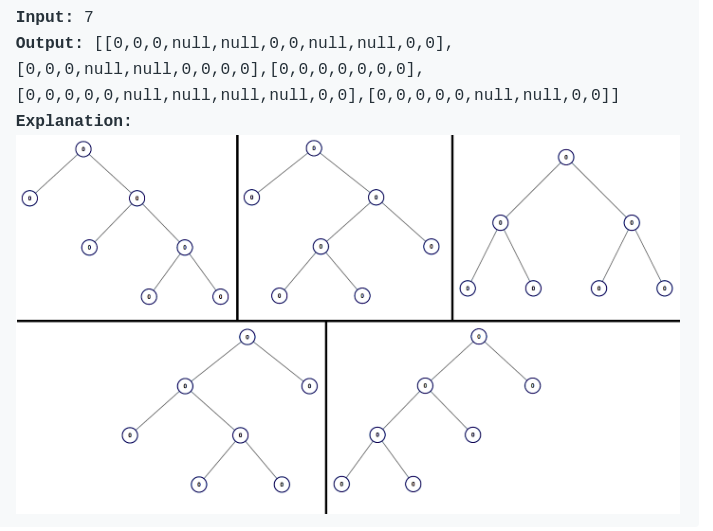

In [10]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
class Solution:
    def allPossibleFBT(self, N: int):
        if N%2 == 0:
            return []
        self.cache = {}
        return self.helper(N)
    
    def helper(self, n):
        if n in self.cache:
            return self.cache[n]
        
        res = []
        if n == 1:
            res.append(TreeNode(0))
            return res
        
        for i in range(1,n,2):
            left_tree = self.helper(i)
            right_tree = self.helper(n-i-1)
            for lt in left_tree:
                for rt in right_tree:
                    root = TreeNode(0)
                    root.left = lt
                    root.right = rt
                    res.append(root)
                    
        self.cache[n] = res
        return res
    
obj = Solution()
obj.allPossibleFBT(7)